# importons les bibliothèques 

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# chargement du dataframe et affichage de l'entete

In [61]:
titanic = pd.read_csv("data/titanic-passengers.csv", sep=';', encoding="iso-8859-1")
df=titanic.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


# Affichage des informations generales les colonnes de données et les valeurs

In [62]:
df.info()
np.shape(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


(891, 12)

In [63]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Modifions d'abord l'index

In [64]:
df= df.set_index('PassengerId')

In [65]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


# Remplaçons les valeurs manquantes

In [66]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [67]:
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)
df['Cabin'].describe()

count         891
unique        147
top       B96 B98
freq          691
Name: Cabin, dtype: object

In [68]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 343 to 428
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 83.5+ KB


# Vérifions que nos données sont prêtes à être traitées

In [70]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,B96 B98,S
76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,B96 B98,S
568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,B96 B98,S
672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


# Etudions la distribution de l'age, du sexe, et de la survie

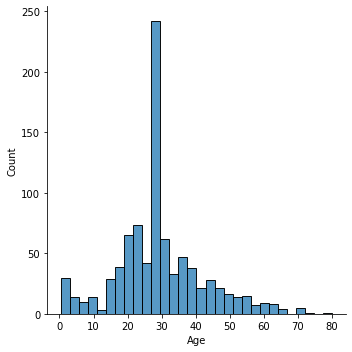

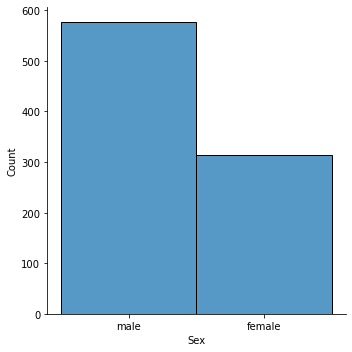

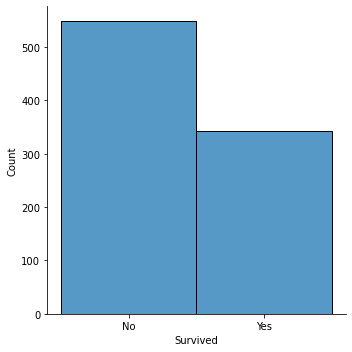

In [71]:
sns.displot(df['Age'])
sns.displot(df['Sex'])
sns.displot(df['Survived'])

# Visualisons la corrélation entre le sexe et l'âge

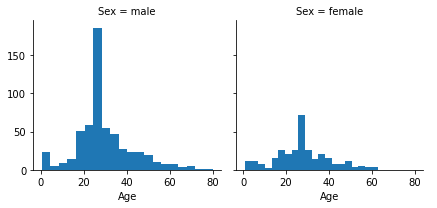

In [72]:
grid=sns.FacetGrid(df, col='Sex')
grid.map(plt.hist,'Age', bins=20)
grid.add_legend()

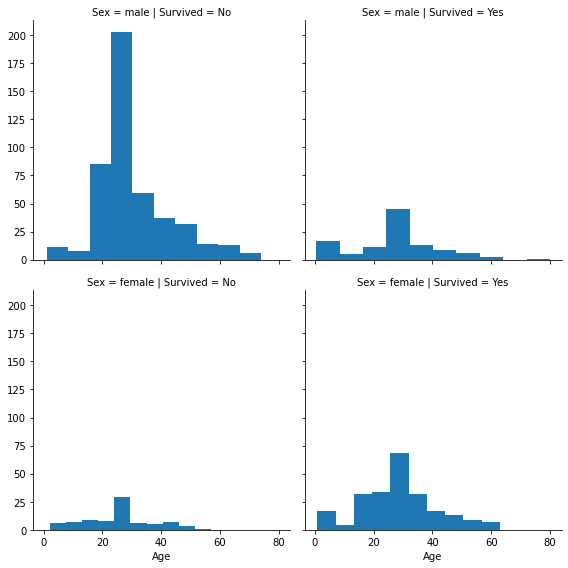

In [73]:
g1 = sns.FacetGrid(df, row='Sex', col='Survived', height=4) 
g1.map(plt.hist, "Age")

# Visualisons la corrélation entre la classe et l'âge

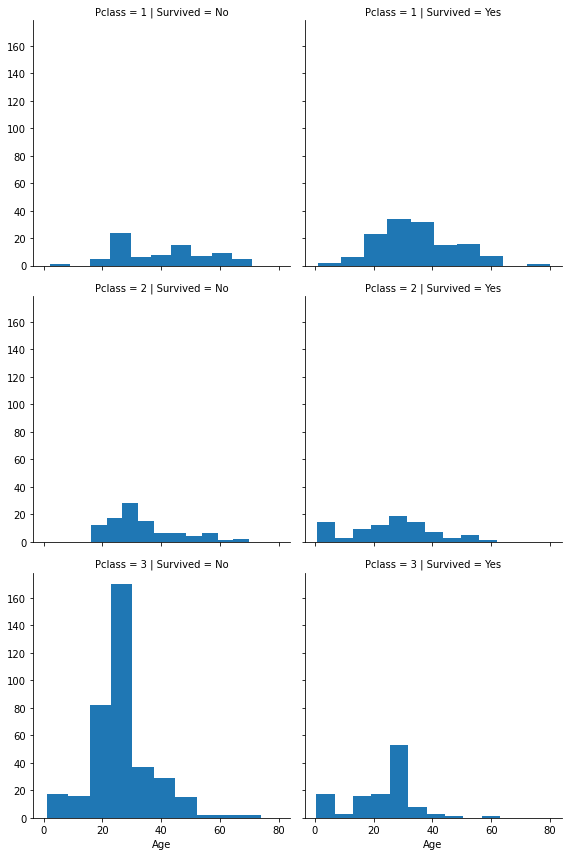

In [74]:
g2 = sns.FacetGrid(df, row='Pclass', col='Survived', height=4) 
g2.map(plt.hist, "Age")

# Visualisons la corrélation entre la classe et le sexe

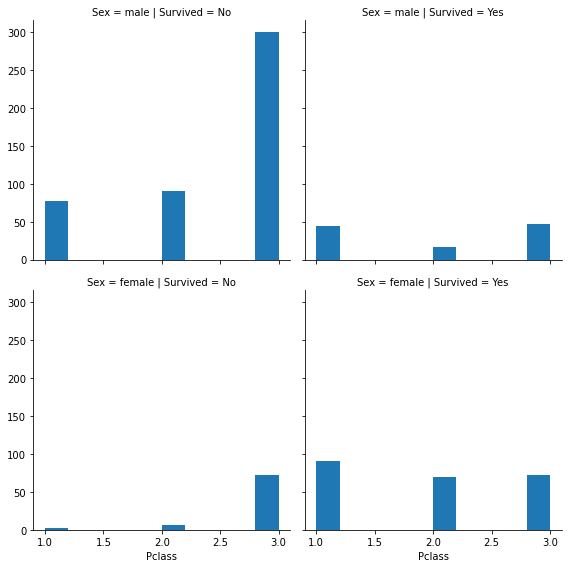

In [75]:
g3 = sns.FacetGrid(df, row='Sex', col='Survived', height=4) 
g3.map(plt.hist, "Pclass")

# Exécution de la fonction suivante

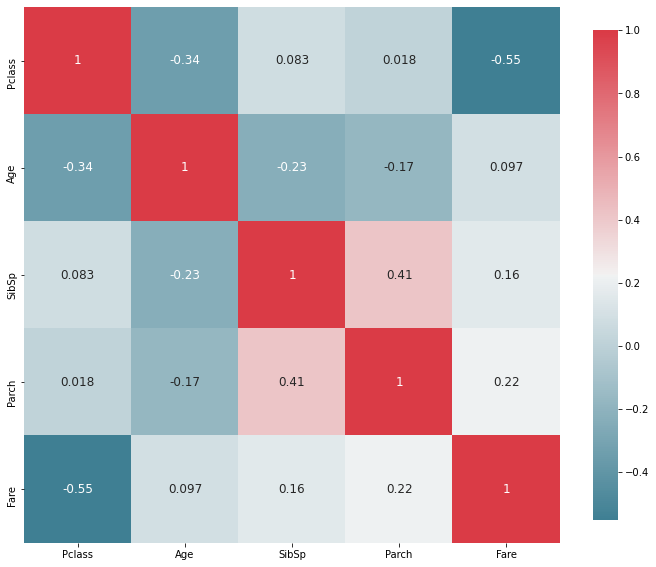

In [76]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df)

# Analyse

# Fonction groupby() et mean()

In [77]:
cleanup={"Survived":{"Yes":1, "No":0}}
df.replace(cleanup,inplace=True)
df[["Pclass","Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


# Suppression de la colonne Name

In [78]:
name= df['Name']
Title=name
df=df.drop('Name', axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
343,0,2,male,28.0,0,0,248740,13.0000,B96 B98,S
76,0,3,male,25.0,0,0,348123,7.6500,F G73,S
641,0,3,male,20.0,0,0,350050,7.8542,B96 B98,S
568,0,3,female,29.0,0,4,349909,21.0750,B96 B98,S
672,0,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S


# Ajout de la fonctionnalité Title

In [79]:
Titre=[]
for i in name:
    a=i.split(",")
    b=a[1].split(".")
    Titre.append(b[0])
df=df.assign(Title=Titre)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
343,0,2,male,28.0,0,0,248740,13.0000,B96 B98,S,Mr
76,0,3,male,25.0,0,0,348123,7.6500,F G73,S,Mr
641,0,3,male,20.0,0,0,350050,7.8542,B96 B98,S,Mr
568,0,3,female,29.0,0,4,349909,21.0750,B96 B98,S,Mrs
672,0,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
10,1,2,female,14.0,1,0,237736,30.0708,B96 B98,C,Mrs
61,0,3,male,22.0,0,0,2669,7.2292,B96 B98,C,Mr
535,0,3,female,30.0,0,0,315084,8.6625,B96 B98,S,Miss


# Corrélation entre le titre et le sexe

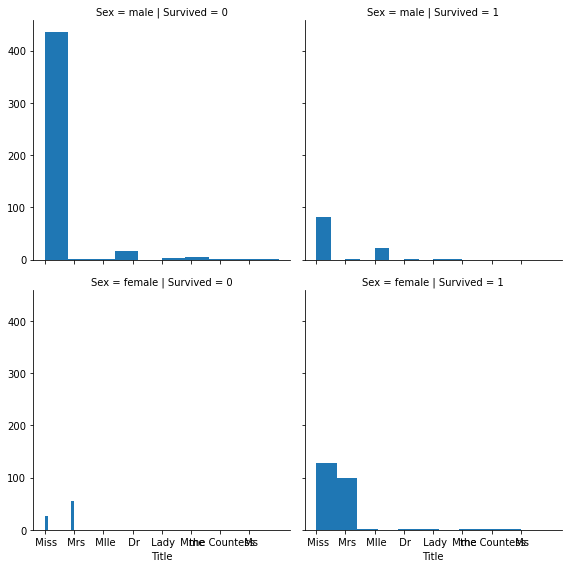

In [80]:
gt1 = sns.FacetGrid(df, row='Sex', col='Survived', height=4) 
gt1.map(plt.hist, "Title")

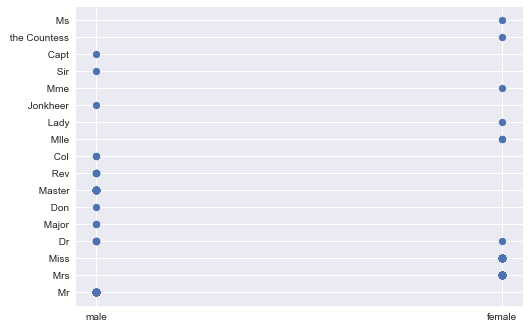

In [109]:
plt.style.use('seaborn')
plt.scatter(x=df['Sex'], y=df['Title']);
plt.show();

# Corrélation entre le titre et l'age

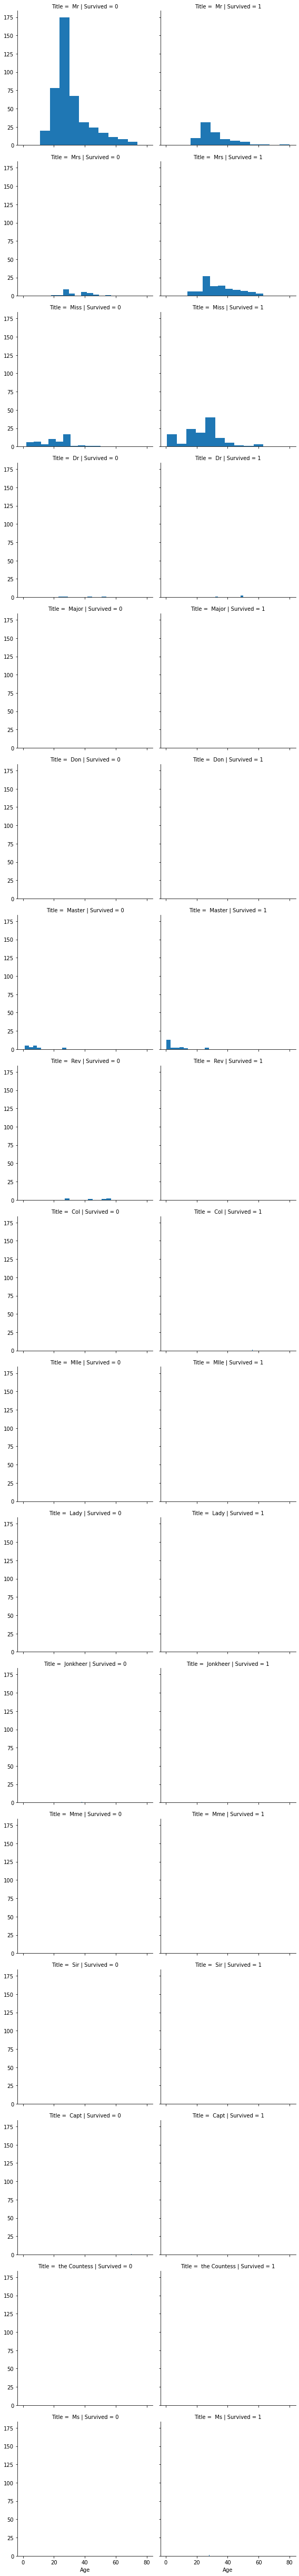

In [81]:
gt2 = sns.FacetGrid(df, row='Title', col='Survived', height=4) 
gt2.map(plt.hist, "Age")

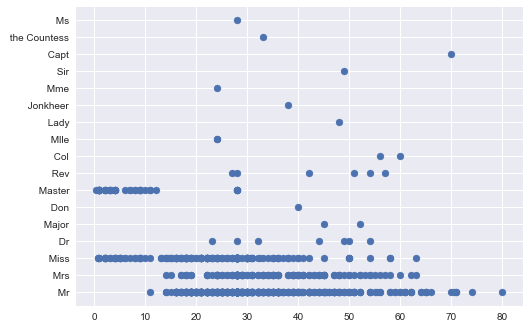

In [110]:
plt.style.use('seaborn')
plt.scatter(x=df['Age'], y=df['Title']);
plt.show();

# Corrélation entre le titre et le prix

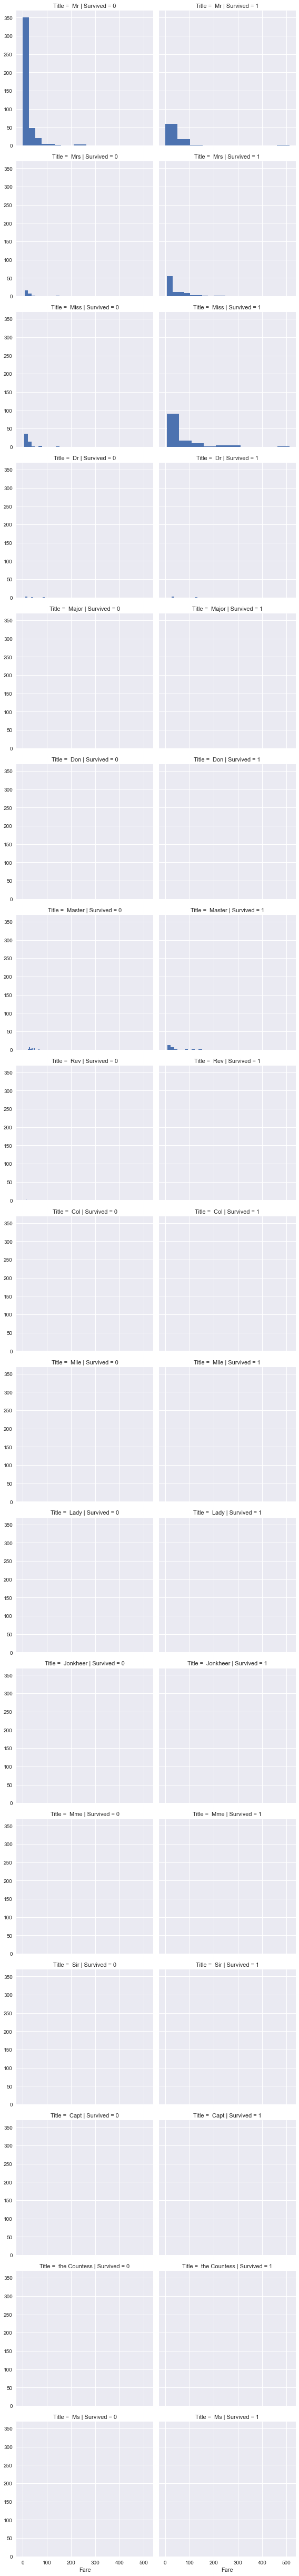

In [118]:
gt3 = sns.FacetGrid(df, row='Title', col='Survived', height=4) 
gt3.map(plt.hist, "Fare")

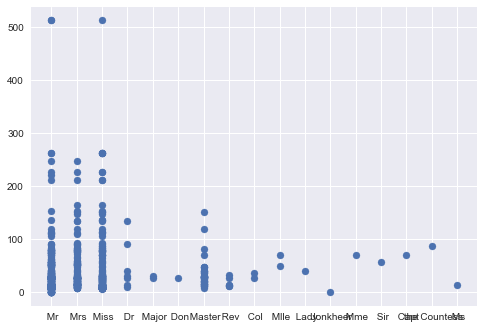

In [117]:
plt.style.use('seaborn')
plt.scatter(x=df['Title'], y=df['Fare']);
plt.show();

# Création du dictionnaire de titres

In [82]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess" : "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

# Regroupement des titres

In [94]:
title_cleanup={"Title":Title_Dictionary}
df.replace(title_cleanup, inplace=True)
df['Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Col               2
 Major             2
 Don               1
 Ms                1
 Capt              1
 Mme               1
 Sir               1
 Jonkheer          1
 Lady              1
 the Countess      1
Name: Title, dtype: int64

# Nouvelle corrélation entre le titre et le sexe

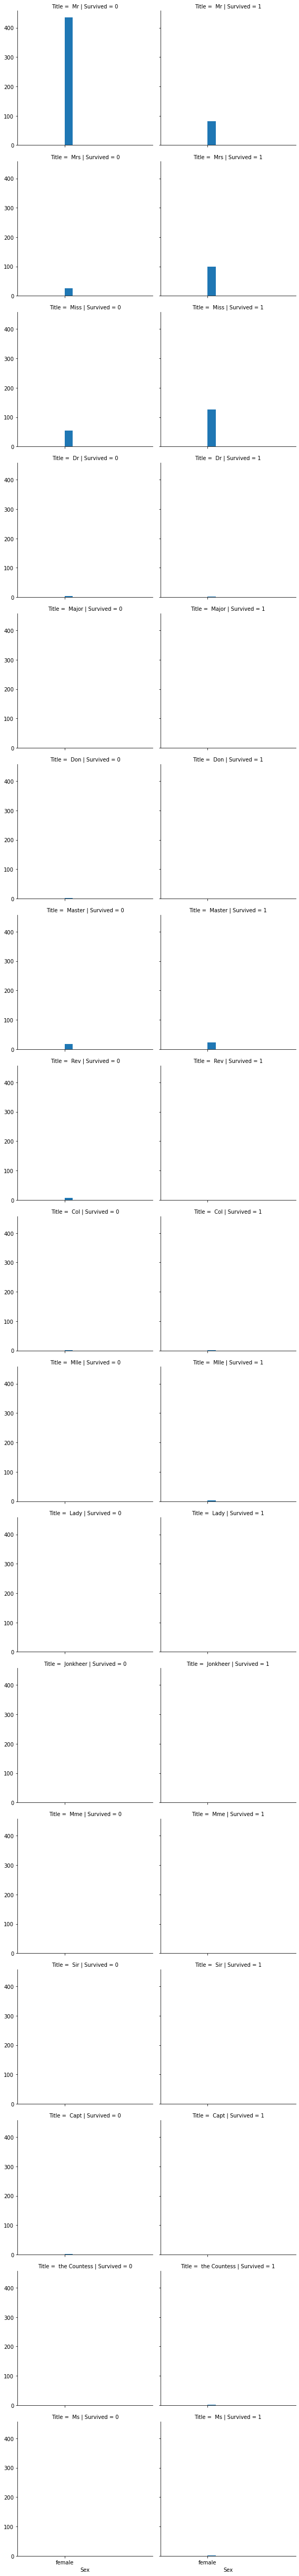

In [96]:
ngt1 = sns.FacetGrid(df, row='Sex', col='Survived', height=4) 
ngt1.map(plt.hist, "Title")

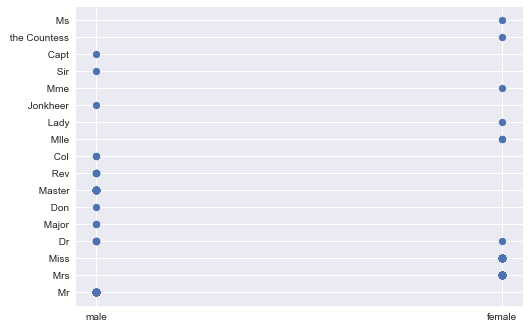

In [116]:
plt.style.use('seaborn')
plt.scatter(x=df['Sex'], y=df['Title']);
plt.show();

# Nouvelle corrélation entre le titre et le prix

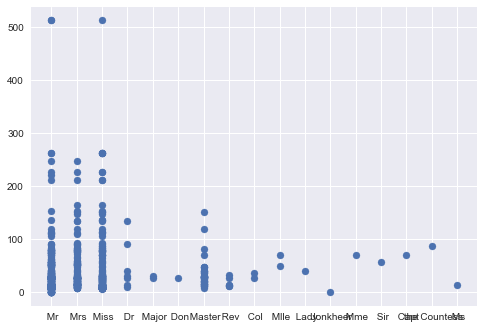

In [115]:
plt.style.use('seaborn')
plt.scatter(x=df['Title'], y=df['Fare']);
plt.show();

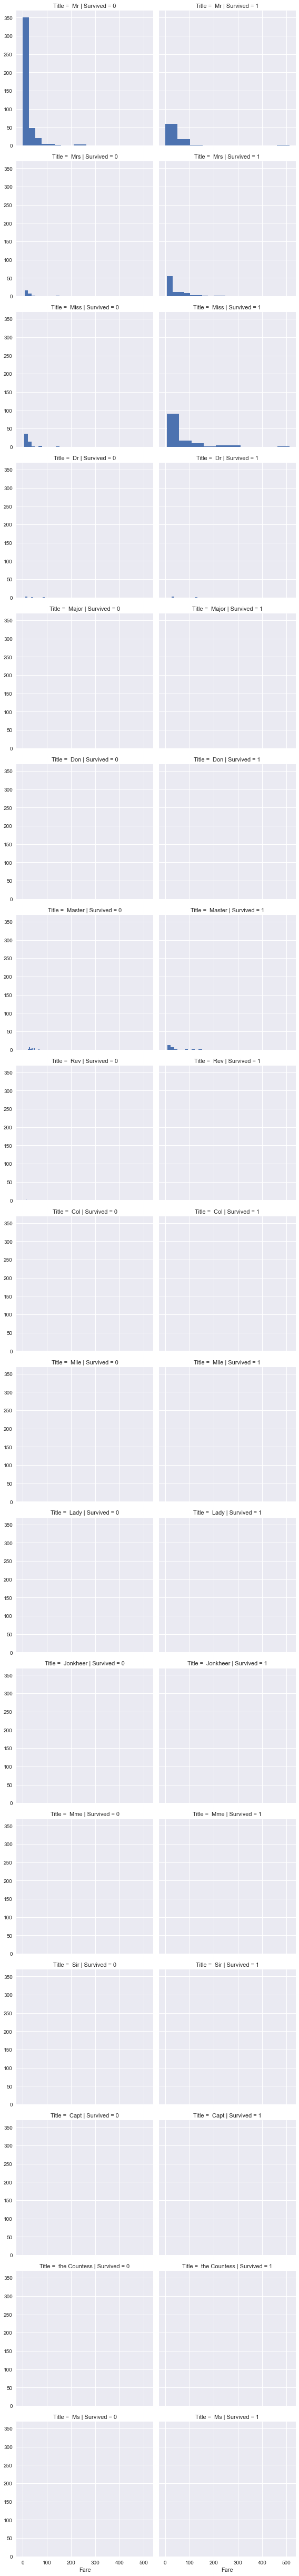

In [121]:
ngt2 = sns.FacetGrid(df, row='Title', col='Survived', height=4) 
ngt2.map(plt.hist, "Fare")

# Nouvelle corrélation entre le titre et l'age

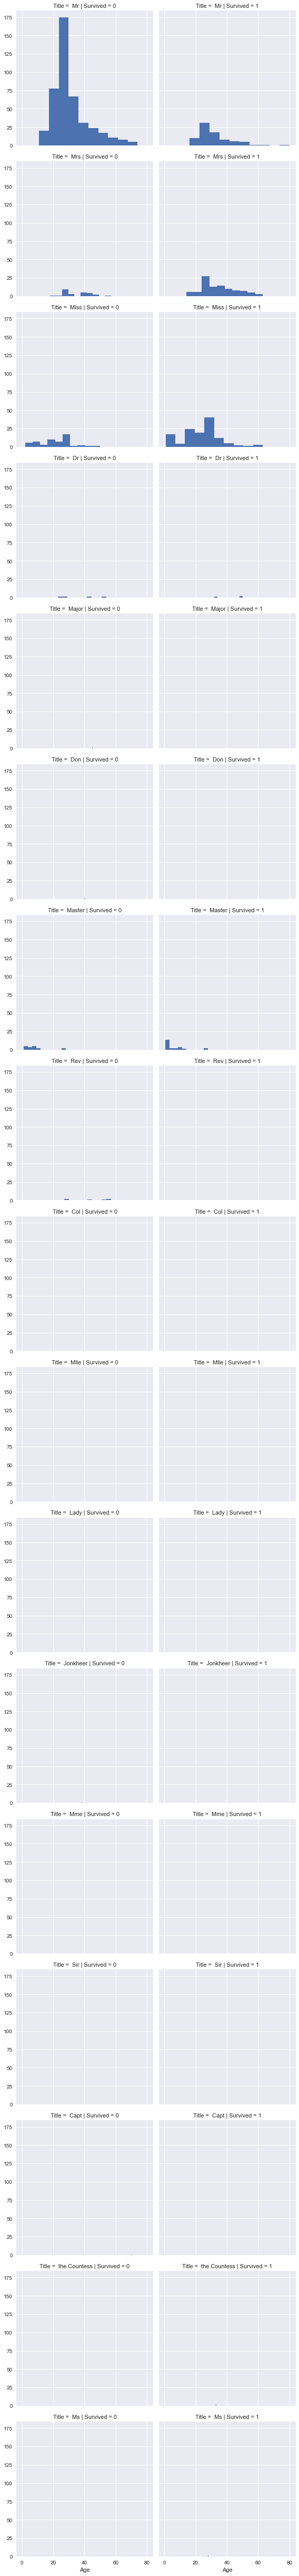

In [122]:
ngt2 = sns.FacetGrid(df, row='Title', col='Survived', height=4) 
ngt2.map(plt.hist, "Age")

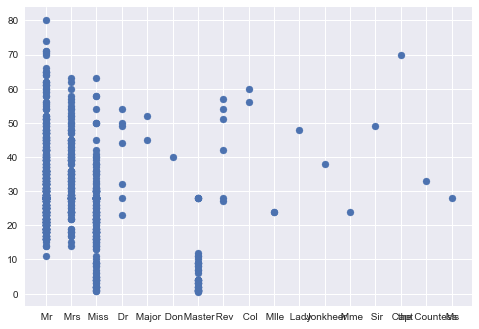

In [123]:
plt.style.use('seaborn')
plt.scatter(x=df['Title'], y=df['Age']);
plt.show();

# Création de la fonctionnalité FamilySize

In [133]:
df['FamilySize']=df['Parch']+df['SibSp']
df.drop(['Parch', 'SibSp'], axis=1)

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize
PassengerId,,,,,,,,,,
343,0,2,male,28.0,248740,13.0000,B96 B98,S,Mr,0
76,0,3,male,25.0,348123,7.6500,F G73,S,Mr,0
641,0,3,male,20.0,350050,7.8542,B96 B98,S,Mr,0
568,0,3,female,29.0,349909,21.0750,B96 B98,S,Mrs,4
672,0,1,male,31.0,F.C. 12750,52.0000,B71,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...
10,1,2,female,14.0,237736,30.0708,B96 B98,C,Mrs,1
61,0,3,male,22.0,2669,7.2292,B96 B98,C,Mr,0
535,0,3,female,30.0,315084,8.6625,B96 B98,S,Miss,0


# Conclusion

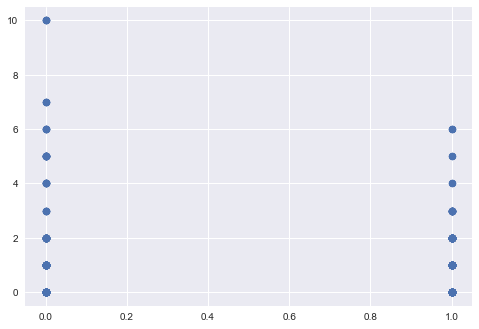

In [136]:
plt.style.use('seaborn')
plt.scatter(x=df['Survived'], y=df['FamilySize']);
plt.show();

In [137]:
df[["FamilySize","Survived"]].groupby(["FamilySize"], as_index=True).mean()

,Survived
FamilySize,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000
